# Determine the starting condition from a sequence

In [ ]:
import keras
import tensorflow as tf
from keras import activations
from tensorflow import Tensor

from Equations import logistic
import matplotlib.pyplot as plt
import random

In [60]:
num_iters = 100
seq_len = 10
epochs = 10

In [34]:
def generate_data(rate):
    y_vals = [0.5]
    for _ in range(num_iters - 1):
        y_vals.append(logistic(y_vals[-1], rate))
    return y_vals, rate


def generate_sequence(input):
    return input[-seq_len:]

def modified_relu(input: Tensor) -> Tensor:
    """
    Relu function + 3.0
    :param input:
    :return:
    """
    return activations.leaky_relu(input) + tf.constant(3.0)
def modified_sigmoid(input: Tensor) -> Tensor:
    """
    Relu function + 3.0
    :param input:
    :return:
    """
    return activations.sigmoid(input) + tf.constant(3.0)

def generate_n_sequences(n_sequences):
    data, labels = [], []
    for _ in range(n_sequences):
        seq, rate = generate_data(random.random() + 3)
        data.append(generate_sequence(seq))
        labels.append(rate)
    return data, labels

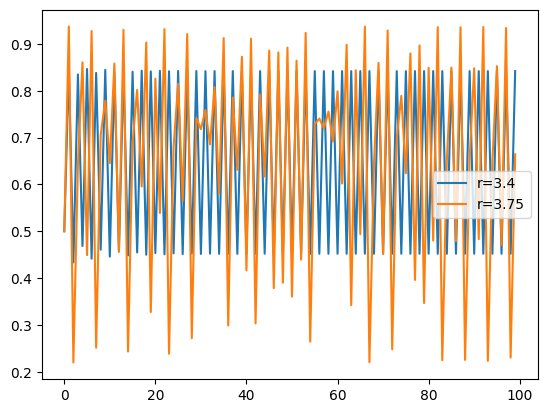

In [4]:
# Example rate of 3.4 and 3.75
plt.plot(generate_data(3.4)[0], label='r=3.4')
plt.plot(generate_data(3.75)[0], label='r=3.75')
plt.legend()

plt.show()

In [48]:
# Create model and use mean squared error

model = keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(seq_len,)),
    tf.keras.layers.Dense(128, activation=modified_relu),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation=modified_sigmoid)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=.0001),
              loss='mse',
              metrics=['accuracy'])


In [49]:
# Train model of sequences of length 10 with 1 epoch

X_train, y_train = generate_n_sequences(50000)
X_test, y_test = generate_n_sequences(100)

In [50]:
seq, rate = generate_data(random.random() + 3)
pred_tensor = generate_sequence(seq)
print(rate)
print(model.predict((pred_tensor,)))
print(model.evaluate(X_test, y_test))

3.371035167548552
1/1 [==============================] - 0s 449ms/step
[[3.4920425]]
4/4 [==============================] - 1s 15ms/step - loss: 0.0870 - accuracy: 0.0000e+00
[0.0869835913181305, 0.0]


In [61]:
model.fit(X_train, y_train, epochs=epochs)

# Evaluate the model on the testing data of 100 sequences
print(model.evaluate(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.0385 - accuracy: 0.0000e+00
Epoch 2/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.0231 - accuracy: 0.0000e+00
Epoch 3/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 4/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.0114 - accuracy: 0.0000e+00
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.0089 - accuracy: 0.0000e+00
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.0098 - accuracy: 0.0000e+00
Epoch 7/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 8/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 9/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 10/10
4/4 [===========

In [71]:
# Run a prediction on an example and actually give an output
seq, rate = generate_data(random.random() + 3)
pred_tensor = generate_sequence(seq)
print(rate)
print(model.predict((pred_tensor,)))

3.3245985329967054
1/1 [==============================] - 1s 634ms/step
[[3.3647814]]
